## 1. Import libraries, test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Mall_Customers.csv')

# We only care about the annual income and spending score
x = dataset.iloc[:, [3, 4]].values

## 2. Using the elbow method to find the optimal number of clusters

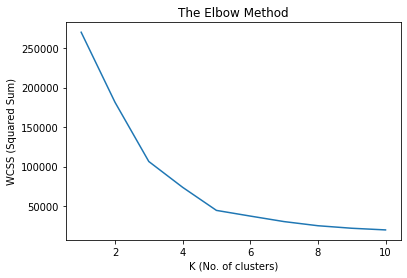

In [2]:
from sklearn.cluster import KMeans

total_k = 10
init_selection = 'k-means++'
deterministic_randomness = 50
wcss = []

for i in range(1, total_k + 1):
    k_model = KMeans(n_clusters=i, init=init_selection, random_state=deterministic_randomness)
    k_model.fit(x)
    sum_of_squared = k_model.inertia_
    wcss.append(sum_of_squared)

plt.plot(range(1, total_k + 1), wcss)
plt.title('The Elbow Method')
plt.xlabel('K (No. of clusters)')
plt.ylabel('WCSS (Squared Sum)')
plt.show()

## 3. Training the K-Means model from selected k value

In [3]:
model = KMeans(n_clusters=5, init=init_selection, random_state=deterministic_randomness)
y_clusters = model.fit_predict(x)

## 4. Display graph and details

Each cluster are colored according to their respective colors. The centroids data points are yellow bordered with black.

Total clusters:  5
Init algorithm:  k-means++
Sum of Squared:  44448.45544793369
No. of iterations:  4


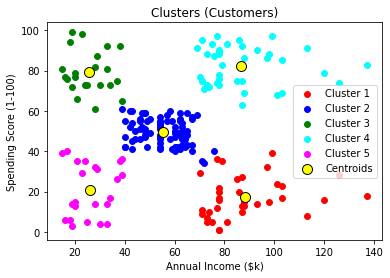

In [4]:
print('Total clusters: ', model.get_params()["n_clusters"])
print('Init algorithm: ', model.get_params()["init"])
print('Sum of Squared: ', model.inertia_)
print('No. of iterations: ', model.n_iter_)

for i, label in enumerate([
    ('red', 'Cluster 1'),
    ('blue', 'Cluster 2'),
    ('green', 'Cluster 3'),
    ('cyan', 'Cluster 4'),
    ('magenta', 'Cluster 5')
]):
    plt.scatter(x[y_clusters == i, 0], x[y_clusters == i, 1], s=35, c=label[0], label=label[1])

plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c='yellow', edgecolors='black', label='Centroids')
plt.title('Clusters (Customers)')
plt.xlabel('Annual Income ($k)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()